<a href="https://colab.research.google.com/github/infung/MachineLearning_practice/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis**

In [223]:
import pandas as pd

df_train = pd.read_csv('./Train.csv')
df_val = pd.read_csv('./Validate.csv')
df_test = pd.read_csv('./Test.csv')

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7487 non-null   int64  
 1   Married            7487 non-null   int64  
 2   Gender             7357 non-null   float64
 3   Age                7487 non-null   int64  
 4   Graduate           7410 non-null   float64
 5   Profession         7375 non-null   object 
 6   Years_of_Working   6745 non-null   float64
 7   Spending_Score     7487 non-null   object 
 8   Family_Members     7177 non-null   float64
 9   Category           7415 non-null   object 
 10  Class(Target)      7487 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 643.5+ KB
None


In [224]:
print(df_train.isnull().sum())

ID                     0
Married                0
Gender               130
Age                    0
Graduate              77
Profession           112
Years_of_Working     742
Spending_Score         0
Family_Members       310
Category              72
Class(Target)          0
dtype: int64


In [225]:
df_train.head()

,ID,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,0,1,1.0,36,NaN,Artist,9.0,Low,2.0,Cat_6,B
1,1,0,1.0,49,1.0,Artist,1.0,Low,1.0,Cat_6,D
2,2,0,NaN,25,0.0,Homemaker,8.0,Low,1.0,Cat_3,A
3,3,1,0.0,77,1.0,Lawyer,0.0,High,2.0,Cat_4,D
4,4,1,0.0,39,1.0,Entertainment,1.0,Average,4.0,Cat_3,D


# **Dropping Irrelevant Columns**

In [226]:
df_train = df_train.drop('ID', axis=1)
df_val = df_val.drop('ID', axis=1)
df_test = df_test.drop('ID', axis=1)
df_test = df_test.drop('Class(Target)', axis=1)

df_list = [df_train, df_val, df_test]

df_train.head()

,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,1,1.0,36,NaN,Artist,9.0,Low,2.0,Cat_6,B
1,0,1.0,49,1.0,Artist,1.0,Low,1.0,Cat_6,D
2,0,NaN,25,0.0,Homemaker,8.0,Low,1.0,Cat_3,A
3,1,0.0,77,1.0,Lawyer,0.0,High,2.0,Cat_4,D
4,1,0.0,39,1.0,Entertainment,1.0,Average,4.0,Cat_3,D


In [227]:
import numpy as np

for df in df_list:

  # Get the column names that have missing values
  columns_with_missing_values = df.columns[df.isnull().any()].tolist()
  # Get the column names that have string values
  columns_to_convert = df.select_dtypes(include=['object']).columns.tolist()
  print('columns with missing values:', columns_with_missing_values)
  print('columns with object type: ', columns_to_convert)
  print()

columns with missing values: ['Gender', 'Graduate', 'Profession', 'Years_of_Working ', 'Family_Members', 'Category']
columns with object type:  ['Profession', 'Spending_Score', 'Category', 'Class(Target)']

columns with missing values: ['Gender', 'Graduate', 'Profession', 'Years_of_Working ', 'Family_Members', 'Category']
columns with object type:  ['Profession', 'Spending_Score', 'Category', 'Class(Target)']

columns with missing values: ['Gender', 'Graduate', 'Profession', 'Years_of_Working ', 'Family_Members', 'Category']
columns with object type:  ['Profession', 'Spending_Score', 'Category']



=> The 'Profession' and 'Category' are categorical columns with missing values.

# **Visualize the correlation between missing values and other features**

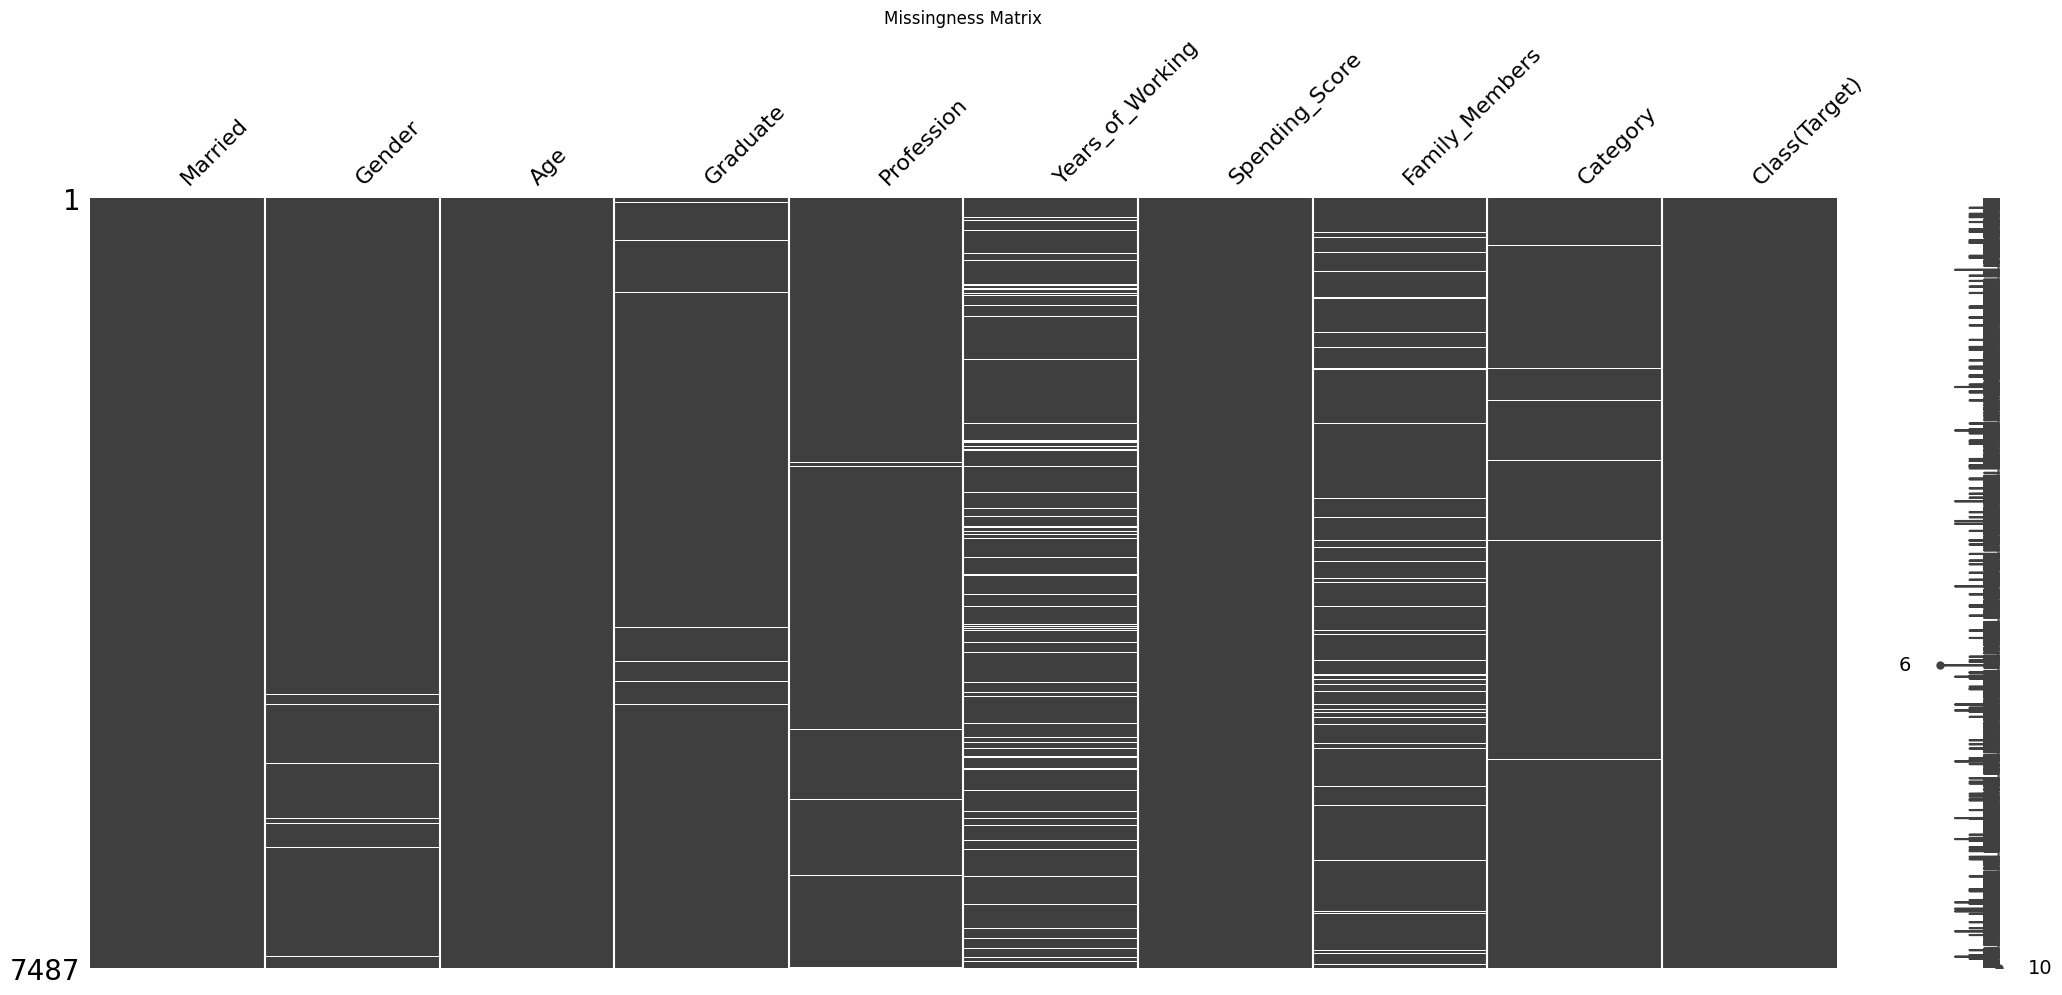

In [228]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_train)
plt.title("Missingness Matrix")
plt.show()

In [229]:
# import seaborn as sns

# sns.pairplot(df_train)
# plt.title("Pair Plot with Missing Values")
# plt.show()


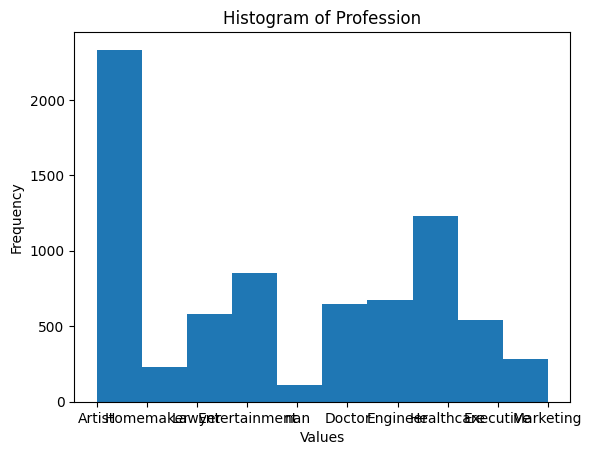

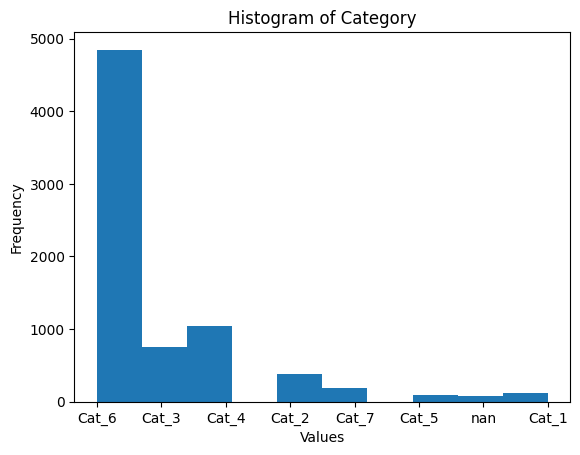

In [230]:
non_numeric_columns_with_missing = df_train.select_dtypes(include='object').columns[df_train.select_dtypes(include='object').isnull().any()]

for column in non_numeric_columns_with_missing:
    values = df_train[column].astype(str)
    plt.hist(values)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

# **Missing values are**
*   **Not randomly distributed**
*   **Missing at random, no relationships between othe features**
*   **=> Use Mode Imputation for categorical features**
*   **=> Use IterativeImputer for numeric features**

# **Convert the Ordinal Columns with String Values to Numeric Values**

=> Use label encoder for oridinal variable; use one-hot encoding (get_dummies) for nominal variable.

In [231]:
from sklearn.preprocessing import LabelEncoder

# Convert ordinal string values to numeric values using label encoding
label_encoder = LabelEncoder()
df_train['Spending_Score'] = label_encoder.fit_transform(df_train['Spending_Score'])
df_val['Spending_Score'] = label_encoder.fit_transform(df_val['Spending_Score'])
df_test['Spending_Score'] = label_encoder.fit_transform(df_test['Spending_Score'])

df_train.head()

,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,1,1.0,36,NaN,Artist,9.0,2,2.0,Cat_6,B
1,0,1.0,49,1.0,Artist,1.0,2,1.0,Cat_6,D
2,0,NaN,25,0.0,Homemaker,8.0,2,1.0,Cat_3,A
3,1,0.0,77,1.0,Lawyer,0.0,1,2.0,Cat_4,D
4,1,0.0,39,1.0,Entertainment,1.0,0,4.0,Cat_3,D


# **Filling Missing Values using Mixed-type Imputation for IterativeImputer**

In [232]:
# from sklearn.linear_model import BayesianRidge, LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# From https://github.com/scikit-learn/scikit-learn/issues/17087

# two_level_cat = Pipeline(
#     [('transformer', OneHotEncoder()), ('estimator', LogisticRegression())] # for two_level_cat data
# )
# multi_level_cat = Pipeline(
#     [('transformer', OneHotEncoder()), ('estimator', DecisionTreeClassifier())] # for multi_level_cat data
# )
# continuous = Pipeline(
#     [('estimator', BayesianRidge())] # for numeric/continuous data
# )

# pipelines = [
#     ('continuous ', continuous , [2, 4, 6, 8]), #  Years_of_Working, Family_Members
#     ('two_level_cat', two_level_cat, []), # Gender, Graduate
#     ('multi_level_cat ', multi_level_cat , [5, 9]), # Profession, Category
# ]

# imputer = from sklearn.experimental import enable_iterative_imputer(
#     estimator=pipelines,
# )

# imputer.fit_transform(df_train)


# **Filling Missing Categorical Values using Mode Imputation**

=> 'Profession' and 'Category' both not randomly distributed => not KNNImmputer

In [233]:
multi_cat_columns_with_missing = ['Profession', 'Category']
bi_cat_columns_with_missing = ['Gender', 'Graduate']

for df in df_list:
  mode_values = df[multi_cat_columns_with_missing].mode().iloc[0]
  df[multi_cat_columns_with_missing] = df[multi_cat_columns_with_missing].fillna(mode_values)

  mode_values2 = df[bi_cat_columns_with_missing].mode().iloc[0]
  df[bi_cat_columns_with_missing] = df[bi_cat_columns_with_missing].fillna(mode_values2).astype(int)

df_train.head()

,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,1,1,36,1,Artist,9.0,2,2.0,Cat_6,B
1,0,1,49,1,Artist,1.0,2,1.0,Cat_6,D
2,0,0,25,0,Homemaker,8.0,2,1.0,Cat_3,A
3,1,0,77,1,Lawyer,0.0,1,2.0,Cat_4,D
4,1,0,39,1,Entertainment,1.0,0,4.0,Cat_3,D


# **Convert Categorical Columns with String Value to Numeric**

In [234]:
df_train = pd.get_dummies(df_train, columns=multi_cat_columns_with_missing)
df_val = pd.get_dummies(df_val, columns=multi_cat_columns_with_missing)
df_test = pd.get_dummies(df_test, columns=multi_cat_columns_with_missing)

df_train.head()

,Married,Gender,Age,Graduate,Years_of_Working,Spending_Score,Family_Members,Class(Target),Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7
0,1,1,36,1,9.0,2,2.0,B,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,49,1,1.0,2,1.0,D,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,25,0,8.0,2,1.0,A,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,0,77,1,0.0,1,2.0,D,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,0,39,1,1.0,0,4.0,D,0,0,...,0,0,0,0,0,1,0,0,0,0


In [235]:
df_train = pd.get_dummies(df_train, columns=['Class(Target)'])
df_val = pd.get_dummies(df_val, columns=['Class(Target)'])

df_train.head()

,Married,Gender,Age,Graduate,Years_of_Working,Spending_Score,Family_Members,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Class(Target)_A,Class(Target)_B,Class(Target)_C,Class(Target)_D
0,1,1,36,1,9.0,2,2.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,49,1,1.0,2,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,25,0,8.0,2,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,77,1,0.0,1,2.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,39,1,1.0,0,4.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


# **Filling Missing Continuous Numeric Values using IterativeImputer**

In [236]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

num_columns_with_missing = ['Years_of_Working', 'Family_Members']

impute_estimator = BayesianRidge()
num_imputer = IterativeImputer(missing_values=np.nan, estimator=impute_estimator)

imputed_data_1 = num_imputer.fit_transform(df_train)
df_train = pd.DataFrame(imputed_data_1, columns=df_train.columns)

imputed_data_2 = num_imputer.fit_transform(df_val)
df_val = pd.DataFrame(imputed_data_2, columns=df_val.columns)

imputed_data_3 = num_imputer.fit_transform(df_test)
df_test = pd.DataFrame(imputed_data_3, columns=df_test.columns)

df_train.head()

,Married,Gender,Age,Graduate,Years_of_Working,Spending_Score,Family_Members,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Class(Target)_A,Class(Target)_B,Class(Target)_C,Class(Target)_D
0,1.0,1.0,36.0,1.0,9.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,49.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,25.0,0.0,8.0,2.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,77.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,39.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [237]:
has_nan_or_inf = df_train.isna().any().any() or not np.isfinite(df_train).all().all()

if has_nan_or_inf:
    print("The DataFrame contains NaN or non-finite values.")
else:
    print("The DataFrame does not contain any NaN or non-finite values.")

The DataFrame does not contain any NaN or non-finite values.


In [238]:
df_train = df_train.astype(int)
df_val = df_val.astype(int)
df_test = df_test.astype(int)

df_train.head()

,Married,Gender,Age,Graduate,Years_of_Working,Spending_Score,Family_Members,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Class(Target)_A,Class(Target)_B,Class(Target)_C,Class(Target)_D
0,1,1,36,1,9,2,2,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,49,1,1,2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,25,0,8,2,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,77,1,0,1,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,39,1,1,0,4,0,0,0,...,0,1,0,0,0,0,0,0,0,1


<Axes: >

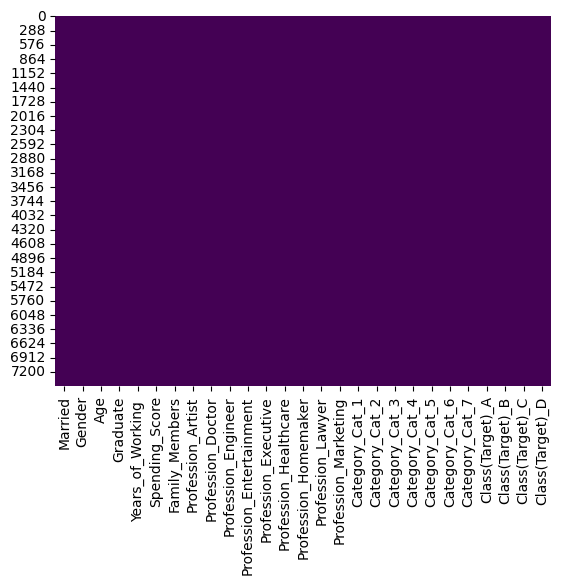

In [239]:
import seaborn as sns

sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')

# **Training Models**

In [240]:
from sklearn.preprocessing import MinMaxScaler

labels = df_train.filter(like='Class(Target)').columns.tolist()
print(labels)

data_x = df_train.drop(labels, axis=1)
data_y = df_train[labels]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(data_x)
y_train = data_y.to_numpy()
print(X_train.shape, y_train.shape)


data_x_val = df_val.drop(labels, axis=1)
data_y_val = df_val[labels]
X_val = scaler.fit_transform(data_x_val)
y_val = data_y_val.to_numpy()
print(X_val.shape, y_val.shape)

data_x_test = df_test # already dropped 'Class(Target)'
X_test = scaler.fit_transform(data_x_test)
print(X_test.shape)

['Class(Target)_A', 'Class(Target)_B', 'Class(Target)_C', 'Class(Target)_D']
(7487, 23) (7487, 4)
(1069, 23) (1069, 4)
(2139, 23)


In [241]:
# from imblearn.over_sampling import SMOTE

# Deal with class imbalanced
# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(X_train, y_train)
# print(X_sm.shape, y_sm.shape)

# **Random Forest Classifier**

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_labels)

y_pred = rf_classifier.predict(X_val)
accuracy = accuracy_score(y_val_labels, y_pred)

print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.4059869036482694


# **MLP**

In [243]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU

input_size = X_train.shape[1]
hidden_size =  20 # [# of output classes ~ # of variable columns] (4~23)
output_size = y_train.shape[1]

model = Sequential()
model.add(Dense(hidden_size, input_dim=input_size, activation = 'relu'))
model.add(Dense(hidden_size, activation = 'relu'))
model.add(Dense(output_size, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 20)                480       
                                                                 
 dense_48 (Dense)            (None, 20)                420       
                                                                 
 dense_49 (Dense)            (None, 4)                 84        
                                                                 
Total params: 984 (3.84 KB)
Trainable params: 984 (3.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [244]:
model.fit(X_train, y_train, epochs=20, batch_size=16)
loss, accuracy = model.evaluate(X_val, y_val)
print("Accuracy: %.2f%%", accuracy)

Epoch 1/20
468/468 [==============================] - 2s 2ms/step - loss: 1.2670 - accuracy: 0.4127
Epoch 2/20
468/468 [==============================] - 1s 3ms/step - loss: 1.2124 - accuracy: 0.4516
Epoch 3/20
468/468 [==============================] - 1s 3ms/step - loss: 1.2010 - accuracy: 0.4595
Epoch 4/20
468/468 [==============================] - 1s 2ms/step - loss: 1.1937 - accuracy: 0.4660
Epoch 5/20
468/468 [==============================] - 1s 2ms/step - loss: 1.1893 - accuracy: 0.4695
Epoch 6/20
468/468 [==============================] - 1s 2ms/step - loss: 1.1858 - accuracy: 0.4758
Epoch 7/20
468/468 [==============================] - 1s 2ms/step - loss: 1.1833 - accuracy: 0.4766
Epoch 8/20
468/468 [==============================] - 1s 2ms/step - loss: 1.1808 - accuracy: 0.4730
Epoch 9/20
468/468 [==============================] - 1s 2ms/step - loss: 1.1779 - accuracy: 0.4783
Epoch 10/20
468/468 [==============================] - 1s 2ms/step - loss: 1.1754 - accuracy: 0.4796

# **RNN-LSTM**

In [252]:
import tensorflow as tf

# Convert data to PyTorch tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float32)

seq_length = 1
X_train_tensor = tf.reshape(X_train_tensor, (-1, seq_length, X_train_tensor.shape[1]))
X_val_tensor = tf.reshape(X_val_tensor, (-1, seq_length, X_val_tensor.shape[1]))

print(X_train_tensor.shape)
print(X_val_tensor.shape)
print(y_train_tensor.shape)

(7487, 1, 23)
(1069, 1, 23)
(7487, 4)


In [266]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

input_size = X_train.shape[1]
hidden_size =  20 # [# of output classes ~ # of variable columns] (4~23)
output_size = y_train.shape[1]
time_steps = seq_length

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(time_steps, input_size)))  # time_steps is the number of time steps in the input sequence
model.add(Dense(output_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 20)                3520      
                                                                 
 dense_87 (Dense)            (None, 4)                 84        
                                                                 
Total params: 3604 (14.08 KB)
Trainable params: 3604 (14.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [267]:
model.fit(X_train_tensor, y_train, epochs=50, batch_size=16)
loss, accuracy = model.evaluate(X_val_tensor, y_val)
print("Accuracy: %.2f%%", accuracy)

Epoch 1/50
468/468 [==============================] - 4s 3ms/step - loss: 1.2843 - accuracy: 0.4111
Epoch 2/50
468/468 [==============================] - 2s 3ms/step - loss: 1.2105 - accuracy: 0.4597
Epoch 3/50
468/468 [==============================] - 1s 3ms/step - loss: 1.2014 - accuracy: 0.4639
Epoch 4/50
468/468 [==============================] - 1s 3ms/step - loss: 1.1974 - accuracy: 0.4663
Epoch 5/50
468/468 [==============================] - 1s 3ms/step - loss: 1.1947 - accuracy: 0.4665
Epoch 6/50
468/468 [==============================] - 1s 3ms/step - loss: 1.1923 - accuracy: 0.4700
Epoch 7/50
468/468 [==============================] - 1s 3ms/step - loss: 1.1904 - accuracy: 0.4709
Epoch 8/50
468/468 [==============================] - 2s 3ms/step - loss: 1.1891 - accuracy: 0.4787
Epoch 9/50
468/468 [==============================] - 2s 4ms/step - loss: 1.1872 - accuracy: 0.4736
Epoch 10/50
468/468 [==============================] - 1s 3ms/step - loss: 1.1857 - accuracy: 0.4760

# **Transformer**

In [264]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_size = X_train.shape[1]
hidden_size =  20 # [# of output classes ~ # of variable columns] (4~23)
output_size = y_train.shape[1]

input_shape = (input_size,)
inputs = Input(shape=input_shape)
x = inputs

# Encoder layers
num_encoder_layers = 6
for _ in range(num_encoder_layers):
    x = Dense(hidden_size, activation='relu')(x)
    x = Dropout(0.1)(x)

# Decoder layers
num_decoder_layers = 6
for _ in range(num_decoder_layers):
    x = Dense(hidden_size, activation='relu')(x)
    x = Dropout(0.1)(x)

outputs = Dense(output_size, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense_74 (Dense)            (None, 20)                480       
                                                                 
 dropout_44 (Dropout)        (None, 20)                0         
                                                                 
 dense_75 (Dense)            (None, 20)                420       
                                                                 
 dropout_45 (Dropout)        (None, 20)                0         
                                                                 
 dense_76 (Dense)            (None, 20)                420       
                                                                 
 dropout_46 (Dropout)        (None, 20)                0   

In [265]:
model.fit(X_train, y_train, epochs=100, batch_size=32)
loss, accuracy = model.evaluate(X_val, y_val)
print("Accuracy: %.2f%%", accuracy)

Epoch 1/50
468/468 [==============================] - 6s 4ms/step - loss: 1.3114 - accuracy: 0.3677
Epoch 2/50
468/468 [==============================] - 2s 4ms/step - loss: 1.2710 - accuracy: 0.4185
Epoch 3/50
468/468 [==============================] - 2s 4ms/step - loss: 1.2577 - accuracy: 0.4181
Epoch 4/50
468/468 [==============================] - 2s 5ms/step - loss: 1.2531 - accuracy: 0.4278
Epoch 5/50
468/468 [==============================] - 2s 4ms/step - loss: 1.2369 - accuracy: 0.4408
Epoch 6/50
468/468 [==============================] - 2s 4ms/step - loss: 1.2346 - accuracy: 0.4458
Epoch 7/50
468/468 [==============================] - 2s 4ms/step - loss: 1.2293 - accuracy: 0.4474
Epoch 8/50
468/468 [==============================] - 2s 4ms/step - loss: 1.2254 - accuracy: 0.4478
Epoch 9/50
468/468 [==============================] - 2s 4ms/step - loss: 1.2268 - accuracy: 0.4477
Epoch 10/50
468/468 [==============================] - 2s 4ms/step - loss: 1.2206 - accuracy: 0.4544